# Pre-processing

## Import dependencies

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(f'Package versions: \n')

print(f'numpy {np.__version__}')
print(f'scipy {scipy.__version__}')
print(f'pandas {pd.__version__}')
print(f'seaborn {sns.__version__}')
print(f'scikit-learn {sklearn.__version__}')

# Notebook tested on: 
# numpy 1.22.2
# scipy 1.7.1
# pandas 1.3.4
# seaborn 0.11.2
# scikit-learn 0.24.2

Package versions: 

numpy 1.23.4
scipy 1.9.3
pandas 1.5.1
seaborn 0.12.1
scikit-learn 1.1.3


In [2]:
# This is to clear the warnings from the notebook, usually we should leave this on
import warnings
warnings.filterwarnings('ignore') 

# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
# Make noise after finish executing cell

#method 1
from IPython.lib.display import Audio
import numpy as np

framerate = 4410
play_time_seconds = 1

t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
audio_data = np.sin(2*np.pi*300*t) + np.sin(2*np.pi*240*t)

# Audio(audio_data, rate=framerate, autoplay=True)

#method 2
import winsound
# winsound.MessageBeep()

## Import data

In [4]:
df1 = pd.read_parquet(r'COVID_Cases_Restricted_Details_03312021_Part_1_parquetnew.parquet')
df2 = pd.read_parquet(r'COVID_Cases_Restricted_Details_03312021_Part_2_parquetnew.parquet')
df3 = pd.read_parquet(r'COVID_Cases_Restricted_Details_03312021_Part_3_parquetnew.parquet')

In [5]:
frames = [df1, df2, df3]
df = pd.concat(frames)

## Save df as parqueet

In [6]:
df.to_parquet('df_concat.parquet')

In [7]:
df.head().T

index,4,8,13,14,16
race_ethnicity_combined,NA,"Black, Non-Hispanic",NA,NA,NA
current_status,Laboratory-confirmed case,Laboratory-confirmed case,Laboratory-confirmed case,Probable Case,Laboratory-confirmed case
cdc_case_earliest_dt,2020-07-07 00:00:00,2020-07-02 00:00:00,2020-10-30 00:00:00,2020-10-30 00:00:00,2020-05-29 00:00:00
cdc_report_dt,2020-07-13 00:00:00,2020-07-04 00:00:00,2020-10-30 00:00:00,2021-02-03 00:00:00,2020-05-29 00:00:00
sex,Male,Male,Male,Male,Male
onset_dt,2020-07-07 00:00:00,2020-07-02 00:00:00,NaT,NaT,NaT
pos_spec_dt,None,None,2020-10-30,2020-10-30,2020-05-29
hosp_yn,No,No,No,No,No
icu_yn,Unknown,No,Missing,Missing,Missing
death_yn,Unknown,Unknown,Missing,No,Missing


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515261 entries, 4 to 7131819
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   race_ethnicity_combined  1515261 non-null  object        
 1   current_status           1515261 non-null  object        
 2   cdc_case_earliest_dt     1515261 non-null  datetime64[ns]
 3   cdc_report_dt            1515260 non-null  datetime64[ns]
 4   sex                      1515261 non-null  object        
 5   onset_dt                 1328084 non-null  datetime64[ns]
 6   pos_spec_dt              1070506 non-null  object        
 7   hosp_yn                  1515261 non-null  object        
 8   icu_yn                   1515261 non-null  object        
 9   death_yn                 1515261 non-null  object        
 10  hc_work_yn               1515261 non-null  object        
 11  pna_yn                   1515261 non-null  object        
 12  

## 'Unknown' values
1. Convert 'Missing' values into 'Unknown'
2. Fill NaNs with 'Unkown' string

In [9]:
df = df.apply(lambda x: x.replace('Missing', 'Unknown'))
df

,race_ethnicity_combined,current_status,cdc_case_earliest_dt,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
index,,,,,,,,,,,,,,,,,,,,,
4,NA,Laboratory-confirmed case,2020-07-07,2020-07-13,Male,2020-07-07,None,No,Unknown,Unknown,...,No,No,Yes,Yes,No,Yes,17001,ADAMS,IL,30 - 39 Years
8,"Black, Non-Hispanic",Laboratory-confirmed case,2020-07-02,2020-07-04,Male,2020-07-02,None,No,No,Unknown,...,No,No,Yes,No,No,Unknown,17001,ADAMS,IL,60 - 69 Years
13,NA,Laboratory-confirmed case,2020-10-30,2020-10-30,Male,NaT,2020-10-30,No,Unknown,Unknown,...,No,No,Yes,No,Yes,Yes,72001,ADJUNTAS,PR,70 - 79 Years
14,NA,Probable Case,2020-10-30,2021-02-03,Male,NaT,2020-10-30,No,Unknown,No,...,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,72001,ADJUNTAS,PR,70 - 79 Years
16,NA,Laboratory-confirmed case,2020-05-29,2020-05-29,Male,NaT,2020-05-29,No,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,72001,ADJUNTAS,PR,70 - 79 Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7131763,"White, Non-Hispanic",Laboratory-confirmed case,2021-01-21,2021-01-21,Female,NaT,2021-01-21,No,Unknown,No,...,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,50027,WINDSOR,VT,50 - 59 Years
7131764,"White, Non-Hispanic",Laboratory-confirmed case,2021-02-03,2021-03-22,Female,2021-02-03,2021-02-06,No,Unknown,No,...,No,No,Yes,No,No,No,50027,WINDSOR,VT,50 - 59 Years
7131765,"White, Non-Hispanic",Laboratory-confirmed case,2021-01-28,2021-01-28,Female,NaT,2021-01-28,No,Unknown,No,...,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,50027,WINDSOR,VT,50 - 59 Years


In [10]:
df = df.apply(lambda x: x.replace('NA', 'Unknown'))
df = df.apply(lambda x: x.replace('N/A', 'Unknown'))
df = df.fillna('Unknown')

## Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [12]:
df_encoded = df.copy()

In [13]:
def label_encode(df, features):
    for feature in features:
        le = LabelEncoder()
        label_encoded = le.fit_transform(df[f'{feature}'])
        df_encoded[f'{feature}'] = label_encoded
        
def target_encode(df, features):
    for feature in features:
        te = TargetEncoder()
        te_encoded = te.fit_transform(df[f'{feature}'], df_encoded['pna_yn'])
        df_encoded[f'{feature}'] = te_encoded
        
def ordinal_encode(df, features):
    for feature in features:
        oe = OrdinalEncoder()
        oe_encoded = oe.fit_transform(df[f'{feature}'], df_encoded['pna_yn'])
        df_encoded[f'{feature}'] = oe_encoded
        
def onehot_encode(df, features):
    for feature in features:
        ohe = OneHotEncoder(drop='missing', sparse=False)
        onehot_encoded = ohe.fit_transform(df[f'{feature}'])
        df_encoded = pd.concat([df, onehot_encoded], axis=1)
        df_encoded.drop(f'{feature}', axis=1, inplace=True)

In [14]:
le_features = ['pna_yn', 'current_status', 'hosp_yn', 'icu_yn', 'death_yn', 'hc_work_yn',
              'abxchest_yn', 'acuterespdistress_yn', 'mechvent_yn',
              'fever_yn', 'sfever_yn', 'chills_yn', 'myalgia_yn',
              'runnose_yn', 'sthroat_yn', 'cough_yn', 'sob_yn',
              'nauseavomit_yn', 'headache_yn', 'abdom_yn', 
               'diarrhea_yn', 'medcond_yn', 'sex'] 
# Note: i think '_yn' stands for yes no

# te_features = ['race_ethnicity_combined', 'res_state'] # res_county dropped for cardinality
te_features = ['race_ethnicity_combined', 'res_county', 'res_state']

# oe_features = ['age_group'] #not needed anymore, manually converted to numerical data

# ohe_features = ['sex'] # moved to label encoder

other_features = ['cdc_report_dt', 'cdc_case_earliest_dt', 'county_fips_code', 
                  'onset_dt', 'pos_spec_dt']

In [15]:
label_encode(df, le_features)

In [16]:
target_encode(df, te_features)

In [17]:
df_encoded['age_group'].value_counts()

20 - 29 Years    267551
30 - 39 Years    228548
40 - 49 Years    224077
50 - 59 Years    219631
10 - 19 Years    178461
60 - 69 Years    167067
70 - 79 Years     96402
0 - 9 Years       66575
80+ Years         62167
Unknown            4782
Name: age_group, dtype: int64

In [18]:
# replace bin by the mean of range
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('Years', ''))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('0 - 9', '5'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('10 - 19', '15'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('20 - 29', '25'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('30 - 39', '35'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('40 - 49', '45'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('50 - 59', '55'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('60 - 69', '65'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('70 - 79', '75'))
df_encoded['age_group'] = df_encoded['age_group'].apply(lambda x: x.replace('80+', '85'))

In [19]:
# replace 'Unknown' with median
df_encoded['age_group'] = df_encoded['age_group'].replace('Unknown', np.nan)
df_encoded['age_group'] = df_encoded['age_group'].fillna(int(df_encoded['age_group'].median()))
df_encoded['age_group'] = df_encoded['age_group'].astype(int)

In [20]:
df_encoded['age_group'].value_counts()

25    267551
45    228859
35    228548
55    219631
15    178461
65    167067
75     96402
5      66575
85     62167
Name: age_group, dtype: int64

label_encode(df, le_features)
target_encode(df, te_features)
ordinal_encode(df, oe_features)
onehot_encode(df, ohe_features)

experiment - testing

In [21]:
# label_encode(df, ['current_status'])

In [22]:
df['current_status'].value_counts(dropna=False)

Laboratory-confirmed case    1400366
Probable Case                 114895
Name: current_status, dtype: int64

In [23]:
df_encoded['current_status'].value_counts(dropna=False)

0    1400366
1     114895
Name: current_status, dtype: int64

## drop 'unnecessary' variables

In [24]:
df_cleaned = df_encoded.drop(other_features, axis=1)

## Save df as parqueet

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515261 entries, 4 to 7131819
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   race_ethnicity_combined  1515261 non-null  float64
 1   current_status           1515261 non-null  int32  
 2   sex                      1515261 non-null  int32  
 3   hosp_yn                  1515261 non-null  int32  
 4   icu_yn                   1515261 non-null  int32  
 5   death_yn                 1515261 non-null  int32  
 6   hc_work_yn               1515261 non-null  int32  
 7   pna_yn                   1515261 non-null  int32  
 8   abxchest_yn              1515261 non-null  int32  
 9   acuterespdistress_yn     1515261 non-null  int32  
 10  mechvent_yn              1515261 non-null  int32  
 11  fever_yn                 1515261 non-null  int32  
 12  sfever_yn                1515261 non-null  int32  
 13  chills_yn                1515261 non-null 

In [26]:
df_cleaned.to_parquet('df_cleaned.parquet')

In [27]:
df_cleaned = pd.read_parquet('df_cleaned.parquet')

In [28]:
df_cleaned.head()

,race_ethnicity_combined,current_status,sex,hosp_yn,icu_yn,death_yn,hc_work_yn,pna_yn,abxchest_yn,acuterespdistress_yn,...,cough_yn,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,res_county,res_state,age_group
index,,,,,,,,,,,,,,,,,,,,,
4,0.060017,0,1,0,1,1,1,0,0,1,...,0,0,0,2,2,0,2,0.070389,0.225918,35
8,0.108255,0,1,0,0,1,1,0,1,1,...,0,0,0,2,0,0,1,0.070389,0.225918,65
13,0.060017,0,1,0,1,1,1,0,0,0,...,2,0,0,2,0,2,2,0.026786,0.430685,75
14,0.060017,1,1,0,1,0,1,0,0,0,...,1,1,1,1,1,1,2,0.026786,0.430685,75
16,0.060017,0,1,0,1,1,1,0,0,0,...,1,1,1,1,1,1,2,0.026786,0.430685,75


## Training test split

In [29]:
X = df_cleaned[df_cleaned.columns[df_cleaned.columns != 'pna_yn']]
y = df_cleaned['pna_yn']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [31]:
drop_features_eda = [
    'cdc_report_dt', 'cdc_case_earliest_dt', 'onset_dt', 'pos_spec_dt', # datetime
    'hosp_yn','icu_yn', 'death_yn', 'mechvent_yn', # target leakage
    'race_ethnicity_combined', 'sex', 'current_status'
    'county_fips_code', 'res_state'] # dependence measure

In [32]:
# df with feature selection
X_eda=X.drop(drop_features_eda, axis=1, errors='ignore') 
# 'errors = ignore' so does not warn if label does not exist

print(len(X_eda.columns))
X_eda.columns

19


Index(['current_status', 'hc_work_yn', 'abxchest_yn', 'acuterespdistress_yn',
       'fever_yn', 'sfever_yn', 'chills_yn', 'myalgia_yn', 'runnose_yn',
       'sthroat_yn', 'cough_yn', 'sob_yn', 'nauseavomit_yn', 'headache_yn',
       'abdom_yn', 'diarrhea_yn', 'medcond_yn', 'res_county', 'age_group'],
      dtype='object')

In [33]:
X_train_eda, X_test_eda, y_train, y_test = train_test_split(
    X_eda, y, test_size=0.33, random_state=42)

In [34]:
X_train_eda1, X_test_eda1 = X_train_eda.copy(), X_test_eda.copy()

## Feature scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

X_train_eda = scale.fit_transform(X_train_eda)
X_test_eda = scale.transform(X_test_eda)

#convert back into df
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train_eda = pd.DataFrame(X_train_eda, columns=X_eda.columns)
X_test_eda = pd.DataFrame(X_test_eda, columns=X_eda.columns)

## Class imbalance

In [36]:
y_train.value_counts(normalize=True)

0    0.933405
1    0.066595
Name: pna_yn, dtype: float64

# Logistic Regression
https://www.analyticsvidhya.com/blog/2021/09/guide-for-building-an-end-to-end-logistic-regression-model/

## Hyperparameter Tuning
Penalty: l1 vs elastic net
(with solver as 'saga')

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# create model
lr = LogisticRegression(solver='saga',
                        random_state=0)

# hyperparameters
distributions = dict(penalty = ['l1','elasticnet'])

# prepare crossvalidation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# create the random search
lr_search = RandomizedSearchCV(lr,
                               distributions,
                               random_state=0,
                               cv = kfold,
                               scoring="f1",
                               verbose=2)

#fit the model
search = lr_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........................................penalty=l1; total time=  10.6s
[CV] END .........................................penalty=l1; total time=  10.7s
[CV] END .........................................penalty=l1; total time=  14.6s
[CV] END .........................................penalty=l1; total time=  10.5s
[CV] END .........................................penalty=l1; total time=  10.0s
[CV] END .................................penalty=elasticnet; total time=   0.1s
[CV] END .................................penalty=elasticnet; total time=   0.1s
[CV] END .................................penalty=elasticnet; total time=   0.0s
[CV] END .................................penalty=elasticnet; total time=   0.0s
[CV] END .................................penalty=elasticnet; total time=   0.0s


In [38]:
# obtain best hyperparameter
print("Best F1 score: ", search.best_score_)
print("Best hyperparameters: ", search.best_params_)
# print(search.best_estimator_)

Best F1 score:  0.7469539467369394
Best hyperparameters:  {'penalty': 'l1'}


According to random-search cross-validation, the best penalty is the 'l1'

Since penalty is 'l1', can tune for solver: 'saga vs sag'

In [39]:
# create model
lr = LogisticRegression(penalty='l1',
                        random_state=0)

# hyperparameters
distributions = dict(solver = ['sag','saga'])

# prepare crossvalidation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# create the random search
lr_search = RandomizedSearchCV(lr,
                               distributions,
                               random_state=0,
                               cv = kfold,
                               scoring="f1",
                               verbose=2)

#fit the model
search = lr_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........................................solver=sag; total time=   0.1s
[CV] END .........................................solver=sag; total time=   0.0s
[CV] END .........................................solver=sag; total time=   0.0s
[CV] END .........................................solver=sag; total time=   0.0s
[CV] END .........................................solver=sag; total time=   0.0s
[CV] END ........................................solver=saga; total time=   9.9s
[CV] END ........................................solver=saga; total time=   9.8s
[CV] END ........................................solver=saga; total time=   9.8s
[CV] END ........................................solver=saga; total time=  10.5s
[CV] END ........................................solver=saga; total time=   9.8s


In [40]:
# obtain best hyperparameter
print("Best F1 score: ", search.best_score_)
print("Best hyperparameters: ", search.best_params_)
# print(search.best_estimator_)

Best F1 score:  0.7469539467369394
Best hyperparameters:  {'solver': 'saga'}


## All Features
### Model

In [41]:
# evaluate a logistic regression model using stratified k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# create model
model = LogisticRegression(penalty = 'l1',
                        solver='saga',
                        random_state=0)

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

# report performance
print('f1 score validation dataset: %.3f (%.3f)' % (mean(scores), std(scores)))

f1 score validation dataset: 0.747 (0.002)


In [42]:
# create model with best params
lr2 = LogisticRegression(penalty = 'l1',
                        solver='saga',
                        random_state=0)

# fit model
lr2.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='saga')

In [43]:
# predict probabilities on test and take probability for class 1([:1])
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]

#predict labels on test dataset
y_pred_test = lr2.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix is : \n", cm)
print("\n")

# ROC- AUC score
print("ROC-AUC score test dataset:  \t", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("Precision score test dataset:\t", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score test dataset:  \t", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score test dataset :  \t", f1_score(y_test,y_pred_test))

Confusion Matrix is : 
 [[462862   3950]
 [ 10889  22336]]


ROC-AUC score test dataset:  	 0.9564909148867646
Precision score test dataset:	 0.84972989424028
Recall score test dataset:  	 0.6722648607975922
f1 score test dataset :  	 0.750651140125355


### Feature importance
https://machinelearningmastery.com/calculate-feature-importance-with-python/
https://zetcode.com/python/fstring/
https://realpython.com/python-formatted-output/
https://stackoverflow.com/questions/59890977/f-string-multiple-format-specifiers

In [45]:
# get importance
importance = lr2.coef_[0]

# summarize feature importance
features = df_cleaned.columns
for i,v in enumerate(importance):
    print(f'({i}) {features[i] : <25}: {v : ^30.3f}')

(0) race_ethnicity_combined  :             0.024             
(1) current_status           :             -0.068            
(2) sex                      :             0.057             
(3) hosp_yn                  :             0.646             
(4) icu_yn                   :             -0.076            
(5) death_yn                 :             0.123             
(6) hc_work_yn               :             -0.011            
(7) pna_yn                   :             1.222             
(8) abxchest_yn              :             0.346             
(9) acuterespdistress_yn     :             0.050             
(10) mechvent_yn              :             0.174             
(11) fever_yn                 :             0.110             
(12) sfever_yn                :             0.076             
(13) chills_yn                :             0.020             
(14) myalgia_yn               :             -0.138            
(15) runnose_yn               :             -0.031            
(1

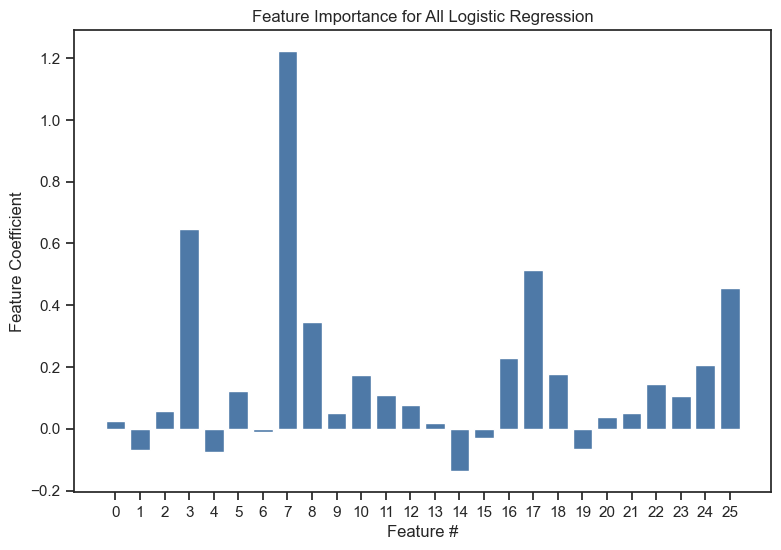

In [46]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance for All Logistic Regression')
plt.xlabel('Feature #')
plt.xticks(np.arange(26))
plt.ylabel('Feature Coefficient')
plt.savefig('Feature Importance for All Logistic Regression.jpg', bbox_inches='tight')
plt.show()

Note: May need to un-normalize features to extract analysis

### Regularization Path
https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_path.html

In [47]:
%%time

from sklearn import linear_model
from sklearn.svm import l1_min_c

cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)

clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="saga",
    tol=1e-4,
    max_iter=int(1e4),
    warm_start=True,
    intercept_scaling=10000.0,
    random_state=0
)

coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X_train, y_train)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

CPU times: total: 2min 55s
Wall time: 2min 56s


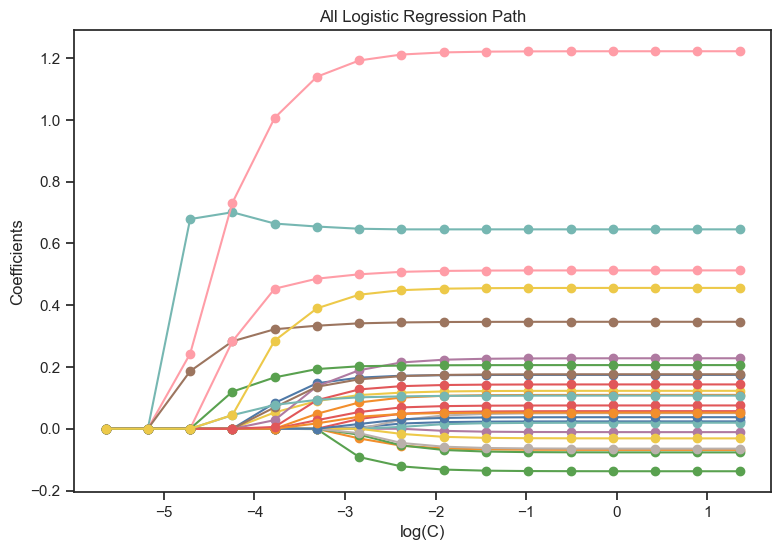

In [48]:
import matplotlib.pyplot as plt

plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("All Logistic Regression Path")
plt.axis("tight")
plt.savefig('regularization_path_all.jpg', bbox_inches='tight')
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html#sklearn.linear_model.lasso_path

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

## EDA Features
### Model

In [49]:
# evaluate a logistic regression model using stratified k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# create model
model = LogisticRegression(penalty = 'l1',
                        solver='saga',
                        random_state=0)

# evaluate model
scores = cross_val_score(model, X_train_eda, y_train, scoring='f1', cv=cv, n_jobs=-1)

# report performance
print('f1 score validation dataset: %.3f (%.3f)' % (mean(scores), std(scores)))

f1 score validation dataset: 0.711 (0.002)


In [50]:
# create model with best params
lr3 = LogisticRegression(penalty = 'l1',
                        solver='saga',
                        random_state=0)

# fit model
lr3.fit(X_train_eda, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='saga')

In [51]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test_eda = lr3.predict_proba(X_test_eda)[:, 1]

#predict labels on test dataset
y_pred_test_eda = lr3.predict(X_test_eda)

In [52]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test_eda)
print("Confusion Matrix is : \n", cm)
print("\n")

# ROC- AUC score
print("ROC-AUC score test dataset:  \t", roc_auc_score(y_test,y_pred_prob_test_eda))
#Precision score
print("Precision score test dataset:\t", precision_score(y_test,y_pred_test_eda))
#Recall Score
print("Recall score test dataset:  \t", recall_score(y_test,y_pred_test_eda))
#f1 score
print("f1 score test dataset :  \t", f1_score(y_test,y_pred_test_eda))

Confusion Matrix is : 
 [[463313   3499]
 [ 12753  20472]]


ROC-AUC score test dataset:  	 0.9451015825532618
Precision score test dataset:	 0.8540319552792958
Recall score test dataset:  	 0.6161625282167043
f1 score test dataset :  	 0.7158542555423456


In [53]:
print(f'intercept: {lr3.intercept_} \n')

features_eda = X_eda.columns
print(f'coefficients:')
for i,v in enumerate(lr3.coef_[0]):
    print(f'({i}) {features_eda[i] : <20}: {v : ^5.3f}')

intercept: [-4.67489637] 

coefficients:
(0) current_status      : -0.124
(1) hc_work_yn          : 0.036
(2) abxchest_yn         : 1.392
(3) acuterespdistress_yn: 0.492
(4) fever_yn            : 0.221
(5) sfever_yn           : 0.145
(6) chills_yn           : 0.050
(7) myalgia_yn          : -0.057
(8) runnose_yn          : -0.190
(9) sthroat_yn          : -0.063
(10) cough_yn            : 0.168
(11) sob_yn              : 0.682
(12) nauseavomit_yn      : 0.215
(13) headache_yn         : -0.191
(14) abdom_yn            : 0.032
(15) diarrhea_yn         : 0.045
(16) medcond_yn          : 0.247
(17) res_county          : 0.329
(18) age_group           : 0.764


### Feature importance

In [54]:
# get importance
importance2 = lr3.coef_[0]

# summarize feature importance
features_eda = X_eda.columns
for i,v in enumerate(importance2):
    print(f'({i}) {features_eda[i] : <20}: {v : ^5.3f}')

(0) current_status      : -0.124
(1) hc_work_yn          : 0.036
(2) abxchest_yn         : 1.392
(3) acuterespdistress_yn: 0.492
(4) fever_yn            : 0.221
(5) sfever_yn           : 0.145
(6) chills_yn           : 0.050
(7) myalgia_yn          : -0.057
(8) runnose_yn          : -0.190
(9) sthroat_yn          : -0.063
(10) cough_yn            : 0.168
(11) sob_yn              : 0.682
(12) nauseavomit_yn      : 0.215
(13) headache_yn         : -0.191
(14) abdom_yn            : 0.032
(15) diarrhea_yn         : 0.045
(16) medcond_yn          : 0.247
(17) res_county          : 0.329
(18) age_group           : 0.764


In [55]:
# to print for excel

# print(f'intercept: {lr3.intercept_} \n')
# for i in range(len(features_eda)):
#     print(features_eda[i])
# for i in range(len(features_eda)):
#     print(importance2[i])

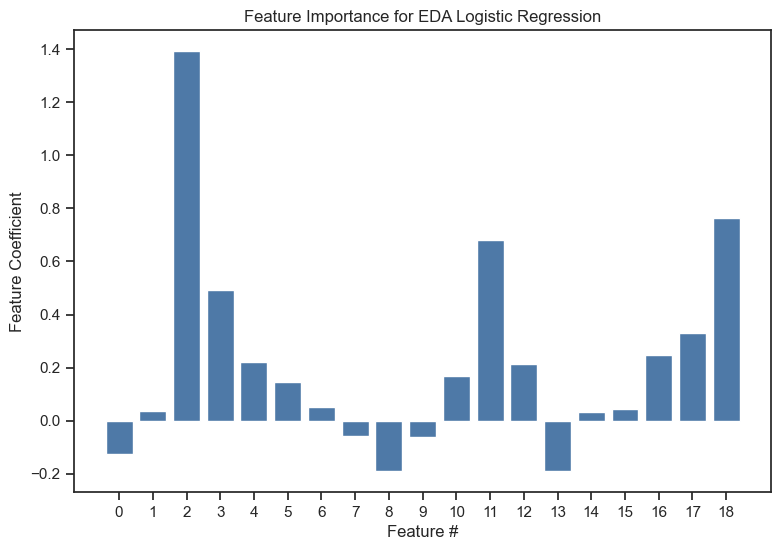

In [56]:
# plot feature importance
plt.bar([x for x in range(len(importance2))], importance2)
plt.title('Feature Importance for EDA Logistic Regression')
plt.xlabel('Feature #')
plt.xticks(np.arange(19))
plt.ylabel('Feature Coefficient')
plt.savefig('Feature Importance for EDA Logistic Regression.jpg', bbox_inches='tight')
plt.show()

### Regularization Path

In [57]:
%%time

cs = l1_min_c(X_train_eda, y_train, loss="log") * np.logspace(0, 7, 16)

clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="saga",
    tol=1e-4,
    max_iter=int(1e4),
    warm_start=True,
    intercept_scaling=10000.0,
    random_state=0
)

coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X_train_eda, y_train)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

CPU times: total: 2min 27s
Wall time: 2min 27s


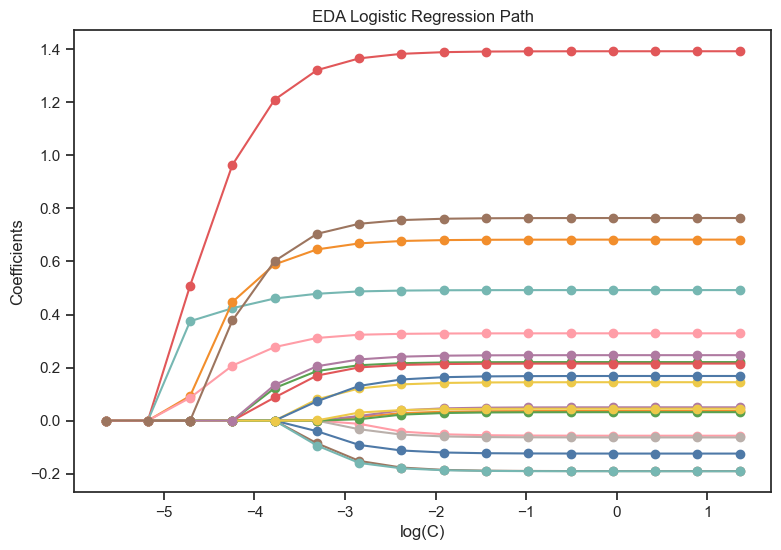

In [58]:
import matplotlib.pyplot as plt

plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("EDA Logistic Regression Path")
plt.axis("tight")
plt.savefig('regularization_path_eda.jpg', bbox_inches='tight')
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html#sklearn.linear_model.lasso_path

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

## LR Features
### Model (1)

In [59]:
drop_features_lr1 = ['current_status',
                    'hc_work_yn',
                    'fever_yn',
                    'sfever_yn',
                    'chills_yn',
                    'myalgia_yn',
                    'runnose_yn',
                    'sthroat_yn',
                    'cough_yn',
                     'nauseavomit_yn',
                     'headache_yn',
                     'abdom_yn',
                     'diarrhea_yn',
                     'medcond_yn',]

In [60]:
X_train_lr1= X_train_eda1.drop(drop_features_lr1, axis=1)
X_test_lr1= X_test_eda1.drop(drop_features_lr1, axis=1)

features_lr1 = X_train_lr1.columns

X_train_lr1 = scale.fit_transform(X_train_lr1)
X_test_lr1 = scale.transform(X_test_lr1)

In [61]:
# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# create model
model = LogisticRegression(penalty = 'l1',
                        solver='saga',
                        random_state=0)

# evaluate model
scores = cross_val_score(model, X_train_lr1, y_train, scoring='f1', cv=cv, n_jobs=-1)

# report performance
print('f1 score validation dataset: %.3f (%.3f)' % (mean(scores), std(scores)))

f1 score validation dataset: 0.700 (0.002)


In [62]:
# create model
lr_lr1 = LogisticRegression(penalty = 'l1',
                        solver='saga',
                        random_state=0)

# fit model
lr_lr1.fit(X_train_lr1, y_train)

# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test_lr1 = lr_lr1.predict_proba(X_test_lr1)[:, 1]

#predict labels on test dataset
y_pred_test_lr1 = lr_lr1.predict(X_test_lr1)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test_lr1)
print("Confusion Matrix is : \n", cm)
print("\n")

# ROC- AUC score
print("ROC-AUC score test dataset:  \t", roc_auc_score(y_test,y_pred_prob_test_lr1))
#Precision score
print("Precision score test dataset:\t", precision_score(y_test,y_pred_test_lr1))
#Recall Score
print("Recall score test dataset:  \t", recall_score(y_test,y_pred_test_lr1))
#f1 score
print("f1 score test dataset :  \t", f1_score(y_test,y_pred_test_lr1))

Confusion Matrix is : 
 [[463536   3276]
 [ 13397  19828]]


ROC-AUC score test dataset:  	 0.9369102151012152
Precision score test dataset:	 0.8582063711911357
Recall score test dataset:  	 0.5967795334838224
f1 score test dataset :  	 0.7040068170924391


In [63]:
print(f'intercept: {lr_lr1.intercept_} \n')

print(f'coefficients:')
for i,v in enumerate(lr_lr1.coef_[0]):
    print(f'({i}) {features_lr1[i] : <20}: {v : ^5.3f}')

intercept: [-4.5819287] 

coefficients:
(0) abxchest_yn         : 1.465
(1) acuterespdistress_yn: 0.536
(2) sob_yn              : 0.770
(3) res_county          : 0.360
(4) age_group           : 0.848


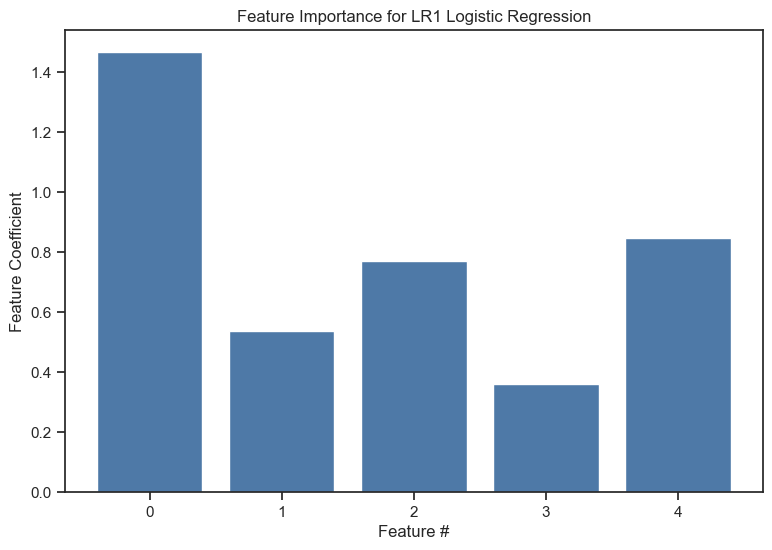

In [64]:
importance = lr_lr1.coef_[0]

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance for LR1 Logistic Regression')
plt.xlabel('Feature #')
plt.xticks(np.arange(len(importance)))
plt.ylabel('Feature Coefficient')
plt.savefig('Feature Importance for LR1 Logistic Regression.jpg', bbox_inches='tight')
plt.show()

In [65]:
type(X_train_lr1)

numpy.ndarray

In [66]:
X_train_lr1_test = pd.DataFrame(X_train_lr1, columns=features_lr1)

In [67]:
%%time

cs = l1_min_c(X_train_lr1_test, y_train, loss="log") * np.logspace(0, 7, 16)

clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="saga",
    tol=1e-4,
    max_iter=int(1e4),
    warm_start=True,
    intercept_scaling=10000.0,
    random_state=0
)

coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X_train_lr1_test, y_train)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

CPU times: total: 1min 39s
Wall time: 1min 38s


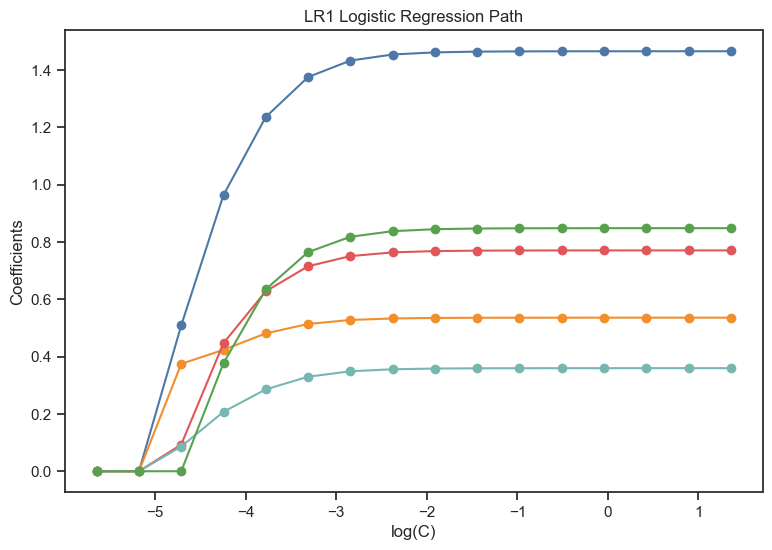

In [68]:
import matplotlib.pyplot as plt

plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("LR1 Logistic Regression Path")
plt.axis("tight")
plt.savefig('regularization_path_lr1.jpg', bbox_inches='tight')
plt.show()

## Model (2)

In [69]:
drop_features_lr2 = ['current_status',
                    'hc_work_yn',
                    'chills_yn',
                    'myalgia_yn',
                    'runnose_yn',
                    'sthroat_yn',
                     'headache_yn',
                     'abdom_yn',
                     'diarrhea_yn']

In [70]:
X_train_lr2= X_train_eda1.drop(drop_features_lr2, axis=1)
X_test_lr2= X_test_eda1.drop(drop_features_lr2, axis=1)

features_lr2= X_train_lr2.columns

X_train_lr2 = scale.fit_transform(X_train_lr2)
X_test_lr2 = scale.transform(X_test_lr2)

In [71]:
# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# create model
model = LogisticRegression(penalty = 'l1',
                        solver='saga',
                        random_state=0)

# evaluate model
scores = cross_val_score(model, X_train_lr2, y_train, scoring='f1', cv=cv, n_jobs=-1)

# report performance
print('f1 score validation dataset: %.3f (%.3f)' % (mean(scores), std(scores)))

f1 score validation dataset: 0.709 (0.002)


In [72]:
# create model
lr_lr2 = LogisticRegression(penalty = 'l1',
                        solver='saga',
                        random_state=0)

# fit model
lr_lr2.fit(X_train_lr2, y_train)

# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test_lr2 = lr_lr2.predict_proba(X_test_lr2)[:, 1]

#predict labels on test dataset
y_pred_test_lr2 = lr_lr2.predict(X_test_lr2)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test_lr2)
print("Confusion Matrix is : \n", cm)
print("\n")

# ROC- AUC score
print("ROC-AUC score test dataset:  \t", roc_auc_score(y_test,y_pred_prob_test_lr2))
#Precision score
print("Precision score test dataset:\t", precision_score(y_test,y_pred_test_lr2))
#Recall Score
print("Recall score test dataset:  \t", recall_score(y_test,y_pred_test_lr2))
#f1 score
print("f1 score test dataset :  \t", f1_score(y_test,y_pred_test_lr2))

Confusion Matrix is : 
 [[463364   3448]
 [ 12924  20301]]


ROC-AUC score test dataset:  	 0.9430782908002071
Precision score test dataset:	 0.8548149395764032
Recall score test dataset:  	 0.6110158013544018
f1 score test dataset :  	 0.7126408537227507


In [73]:
print(f'intercept: {lr_lr2.intercept_} \n')

print(f'coefficients:')
for i,v in enumerate(lr_lr2.coef_[0]):
    print(f'({i}) {features_lr2[i] : <20}: {v : ^5.3f}')

intercept: [-4.662281] 

coefficients:
(0) abxchest_yn         : 1.419
(1) acuterespdistress_yn: 0.497
(2) fever_yn            : 0.219
(3) sfever_yn           : 0.117
(4) cough_yn            : 0.113
(5) sob_yn              : 0.665
(6) nauseavomit_yn      : 0.188
(7) medcond_yn          : 0.268
(8) res_county          : 0.346
(9) age_group           : 0.808


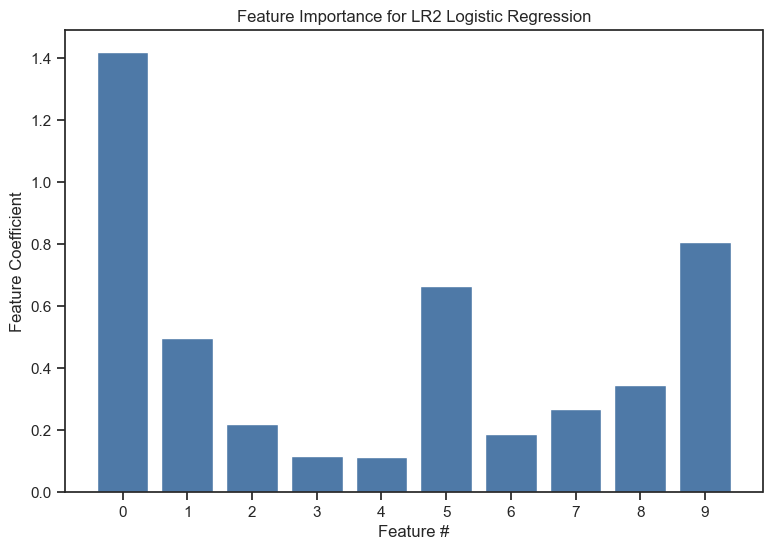

In [74]:
importance = lr_lr2.coef_[0]

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance for LR2 Logistic Regression')
plt.xlabel('Feature #')
plt.xticks(np.arange(len(importance)))
plt.ylabel('Feature Coefficient')
plt.savefig('Feature Importance for LR2 Logistic Regression.jpg', bbox_inches='tight')
plt.show()

In [75]:
%%time

cs = l1_min_c(X_train_lr2, y_train, loss="log") * np.logspace(0, 7, 16)

clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="saga",
    tol=1e-4,
    max_iter=int(1e4),
    warm_start=True,
    intercept_scaling=10000.0,
    random_state=0
)

coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X_train_lr2, y_train)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

CPU times: total: 2min 3s
Wall time: 2min 4s


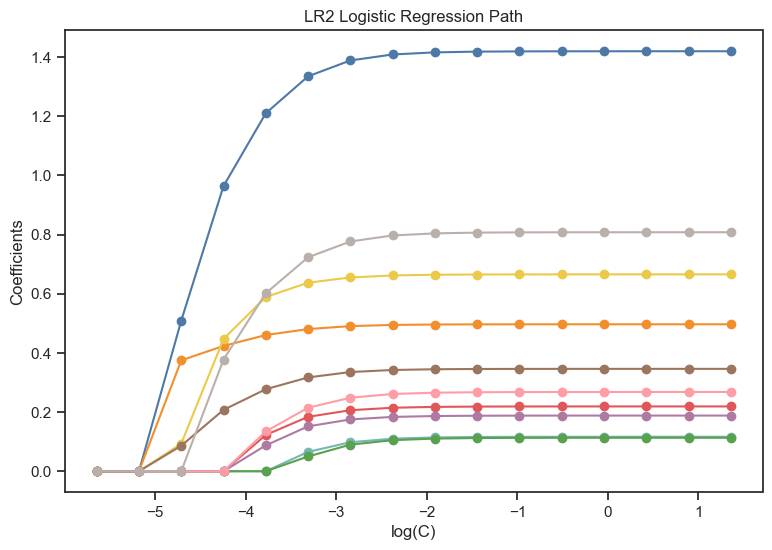

In [76]:
import matplotlib.pyplot as plt

plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("LR2 Logistic Regression Path")
plt.axis("tight")
plt.savefig('regularization_path_lr2.jpg', bbox_inches='tight')
plt.show()

# LinearSVC
https://www.youtube.com/watch?v=jzKSAeJpC6s

Often in Machine Learning and Data Science, you need to perform a sequence of different transformations of the input data (such as finding a set of features or generating new features) before applying a final estimator. Pipeline gives you a single interface for encapsulating transformers and predictors to simplify the process. Since transformers are usually combined with estimators for preprocessing, using pipeline in scikit-learn can be really useful. To be precise, Pipelines sequentially apply a list of transformers and a final estimator. Therefore, the purpose of the pipeline is to assemble several steps that can be cross-validated while setting different parameters.

In summary: Piplelines are built up of a list of transformers and a final estimator, allowing us to make predictions based on the raw input data (basically pre-processing).

* https://scikit-learn.org/stable/modules/svm.html
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
* https://towardsdatascience.com/everything-about-svm-classification-above-and-beyond-cc665bfd993e

## Benchmark model

In [77]:
%%time

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svc = make_pipeline(StandardScaler(),
                    LinearSVC(penalty='l1', dual=False, random_state=0))

svc.fit(X_train, y_train)

CPU times: total: 9.17 s
Wall time: 9.38 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(dual=False, penalty='l1', random_state=0))])

In [78]:
print(svc.named_steps['linearsvc'].coef_)
print(svc.named_steps['linearsvc'].intercept_)
print(svc.predict(X_test))

[[ 0.00543484 -0.01374336  0.01533662  0.17408419 -0.02214105  0.03675044
  -0.00731626  0.33912049  0.08330205  0.01792978  0.04050698  0.01919067
   0.01228441  0.00257291 -0.03396514 -0.00350077  0.04935151  0.10284362
   0.04031934 -0.01340157  0.00968343  0.00662351  0.03102047  0.03050849
   0.05719993  0.08810083]]
[-1.19933403]
[0 0 0 ... 0 0 0]


In [79]:
#predict labels on test dataset
y_pred_test = svc.predict(X_test)

#f1 score
print("f1 score test dataset :  \t", f1_score(y_test,y_pred_test))

f1 score test dataset :  	 0.7465532263851161


## Hyperparameter tuning
Hyperparameter tuning penalty term.
If l1, loss must be the default squared_hinge, but if l2, can hypertune for hinge vs squared_hinge.

In [80]:
# create model
# svc2 = make_pipeline(StandardScaler(),
#                      LinearSVC(dual=False, random_state=0))

svc2 = LinearSVC(dual=False, random_state=0)


# hyperparameters
distributions = dict(penalty = ['l1','l2'])

# prepare crossvalidation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# create the random search
svc2_search = RandomizedSearchCV(svc2,
                                   distributions,
                                   random_state=0,
                                   cv = kfold,
                                   scoring="f1",
                                   verbose=2)

#fit the model
search2 = svc2_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........................................penalty=l1; total time=   8.6s
[CV] END .........................................penalty=l1; total time=   6.9s
[CV] END .........................................penalty=l1; total time=   6.9s
[CV] END .........................................penalty=l1; total time=   6.9s
[CV] END .........................................penalty=l1; total time=   7.0s
[CV] END .........................................penalty=l2; total time=   3.4s
[CV] END .........................................penalty=l2; total time=   3.3s
[CV] END .........................................penalty=l2; total time=   2.9s
[CV] END .........................................penalty=l2; total time=   3.5s
[CV] END .........................................penalty=l2; total time=   3.2s


In [81]:
# obtain best hyperparameter
print("Best F1 score: ", search2.best_score_)
print("Best hyperparameters: ", search2.best_params_)
# print(search.best_estimator_)

Best F1 score:  0.7422395857237404
Best hyperparameters:  {'penalty': 'l1'}


Hyperparameter tuning with pipeline

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# create model
svc3 = Pipeline([('scale', StandardScaler()),
                 ('svc', LinearSVC(dual=False, random_state=0))])

# hyperparameters
param_grid = {'svc__penalty': ['l1','l2']}
# param_grid = {'svc__loss': ['square_hinge', 'hinge']}

# prepare crossvalidation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# create the random search
svc3_search = GridSearchCV(svc3,
                           param_grid,
                           cv = kfold,
                           scoring="f1",
                           verbose=2)

#fit the model
search3 = svc3_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ....................................svc__penalty=l1; total time=   7.1s
[CV] END ....................................svc__penalty=l1; total time=   7.1s
[CV] END ....................................svc__penalty=l1; total time=   7.2s
[CV] END ....................................svc__penalty=l1; total time=   7.3s
[CV] END ....................................svc__penalty=l1; total time=   7.3s
[CV] END ....................................svc__penalty=l2; total time=   3.3s
[CV] END ....................................svc__penalty=l2; total time=   3.7s
[CV] END ....................................svc__penalty=l2; total time=   3.2s
[CV] END ....................................svc__penalty=l2; total time=   3.7s
[CV] END ....................................svc__penalty=l2; total time=   3.9s


In [83]:
# obtain best hyperparameter
print("Best F1 score: ", search3.best_score_)
print("Best hyperparameters: ", search3.best_params_)
# print(search.best_estimator_)

Best F1 score:  0.7422395857237404
Best hyperparameters:  {'svc__penalty': 'l1'}


## All Features
### Model

In [84]:
# evaluate a SVC model using stratified k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# create model
model = Pipeline([('scale', StandardScaler()),
                 ('svc', LinearSVC(penalty='l1', dual=False, random_state=0))])

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
# report performance
print('Validation f1: %.3f (%.3f)' % (mean(scores), std(scores)))

Validation f1: 0.742 (0.001)


In [85]:
svc4 = Pipeline([('scale', StandardScaler()),
                 ('svc', LinearSVC(penalty='l1', dual=False, random_state=0))])

svc4.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', LinearSVC(dual=False, penalty='l1', random_state=0))])

In [86]:
print(svc4.named_steps['svc'].coef_) #need to use .named_steps[''] to access model in pipeline
print(svc4.named_steps['svc'].intercept_)
print(svc4.named_steps['svc'].predict(X_test))

[[ 0.00543484 -0.01374336  0.01533662  0.17408419 -0.02214105  0.03675044
  -0.00731626  0.33912049  0.08330205  0.01792978  0.04050698  0.01919067
   0.01228441  0.00257291 -0.03396514 -0.00350077  0.04935151  0.10284362
   0.04031934 -0.01340157  0.00968343  0.00662351  0.03102047  0.03050849
   0.05719993  0.08810083]]
[-1.19933403]
[0 0 0 ... 0 0 0]


In [87]:
#predict labels on test dataset
y_pred_test = svc4.named_steps['svc'].predict(X_test)

#f1 score
print("Test f1:  \t", f1_score(y_test,y_pred_test))

Test f1:  	 0.7465532263851161


### Feature importance
https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

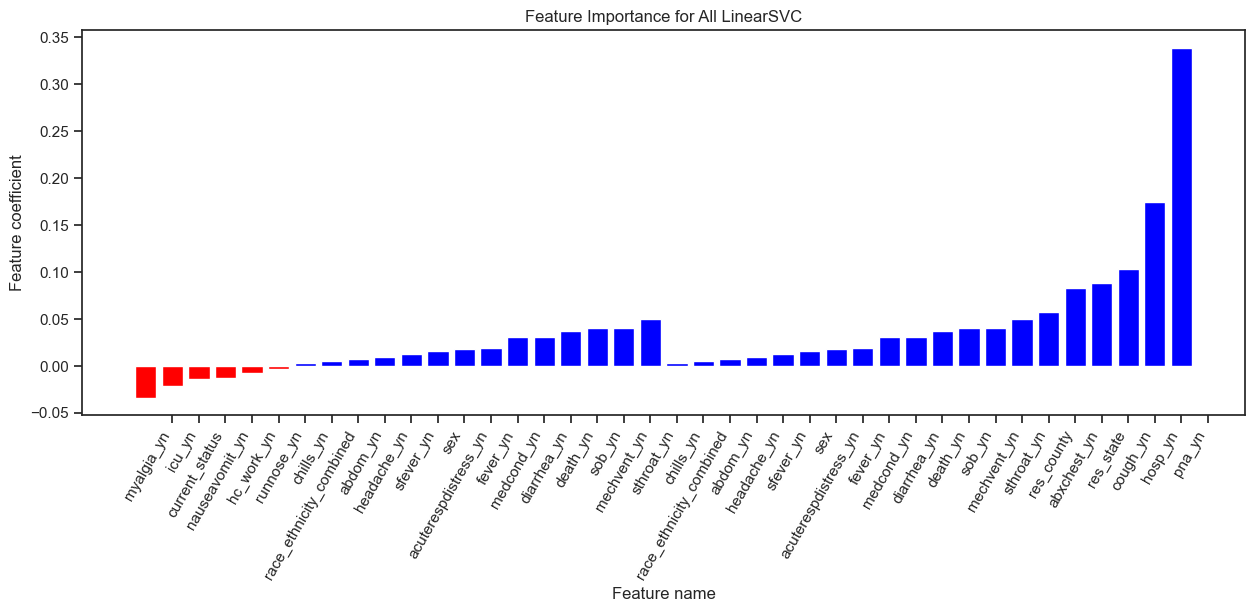

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.ylabel('Feature coefficient')
    plt.xlabel('Feature name')
    plt.title('Feature Importance for All LinearSVC')
    plt.savefig('Feature Importance for All Linear SVC.jpg', bbox_inches='tight')
    plt.show()
    
plot_coefficients(svc4.named_steps['svc'], features)

In [89]:
importance3 = svc4.named_steps['svc'].coef_.ravel()

for i,v in enumerate(importance3):
    print(f'({i}) {features[i] : <25}: {v : ^30.3f}')

(0) race_ethnicity_combined  :             0.005             
(1) current_status           :             -0.014            
(2) sex                      :             0.015             
(3) hosp_yn                  :             0.174             
(4) icu_yn                   :             -0.022            
(5) death_yn                 :             0.037             
(6) hc_work_yn               :             -0.007            
(7) pna_yn                   :             0.339             
(8) abxchest_yn              :             0.083             
(9) acuterespdistress_yn     :             0.018             
(10) mechvent_yn              :             0.041             
(11) fever_yn                 :             0.019             
(12) sfever_yn                :             0.012             
(13) chills_yn                :             0.003             
(14) myalgia_yn               :             -0.034            
(15) runnose_yn               :             -0.004            
(1

## EDA Features
### Model

In [90]:
# evaluate a SVC using stratified k-fold cross-validation

# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# create model
model = Pipeline([('scale', StandardScaler()),
                 ('svc', LinearSVC(penalty='l1', dual=False, random_state=0))])

# evaluate model
scores = cross_val_score(model, X_train_eda, y_train, scoring='f1', cv=cv, n_jobs=-1)

# report performance
print('Validation f1: %.3f (%.3f)' % (mean(scores), std(scores)))

Validation f1: 0.699 (0.002)


In [91]:
svc5 = Pipeline([('scale', StandardScaler()),
                 ('svc', LinearSVC(penalty='l1', dual=False, random_state=0))])

svc5.fit(X_train_eda, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', LinearSVC(dual=False, penalty='l1', random_state=0))])

In [92]:
print(svc5.named_steps['svc'].coef_) #need to use .named_steps[''] to access model in pipeline
print(svc5.named_steps['svc'].intercept_)
print(svc5.named_steps['svc'].predict(X_test_eda))

[[-0.02884358  0.00585685  0.38653684  0.13010348  0.05650369  0.02915941
   0.00800379 -0.01571566 -0.05333635 -0.01201201  0.03140665  0.15174742
   0.05648596 -0.04499929  0.00627202  0.00539397  0.05528331  0.09822278
   0.16659584]]
[-1.2379312]
[0 0 0 ... 0 0 0]


In [93]:
#predict labels on test dataset
y_pred_test_eda = svc5.named_steps['svc'].predict(X_test_eda)

#f1 score
print("test f1:  \t", f1_score(y_test, y_pred_test_eda))

test f1:  	 0.7028015271280313


### Feature importance
https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

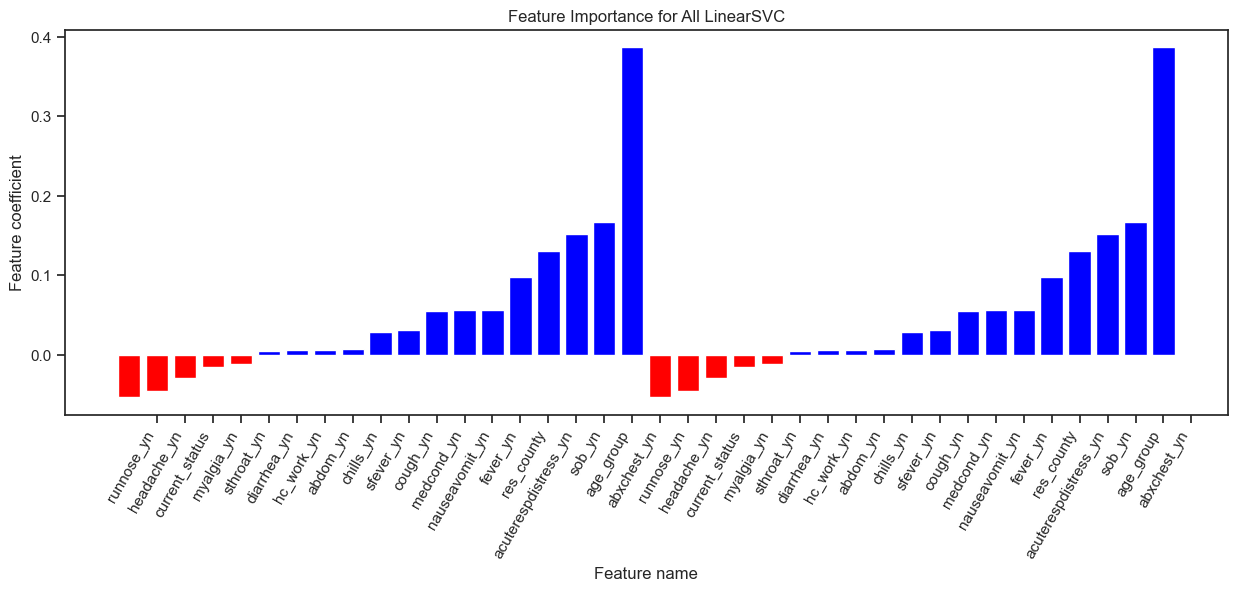

In [94]:
plot_coefficients(svc5.named_steps['svc'], features_eda, top_features=19)

In [95]:
importance4 = svc5.named_steps['svc'].coef_.ravel()

for i,v in enumerate(importance4):
    print(f'({i}) {features_eda[i] : <25}: {v : ^30.3f}')

(0) current_status           :             -0.029            
(1) hc_work_yn               :             0.006             
(2) abxchest_yn              :             0.387             
(3) acuterespdistress_yn     :             0.130             
(4) fever_yn                 :             0.057             
(5) sfever_yn                :             0.029             
(6) chills_yn                :             0.008             
(7) myalgia_yn               :             -0.016            
(8) runnose_yn               :             -0.053            
(9) sthroat_yn               :             -0.012            
(10) cough_yn                 :             0.031             
(11) sob_yn                   :             0.152             
(12) nauseavomit_yn           :             0.056             
(13) headache_yn              :             -0.045            
(14) abdom_yn                 :             0.006             
(15) diarrhea_yn              :             0.005             
(1

In [96]:
drop_features_svc = ['hc_work_yn', 'chills_yn', 'abdom_yn', 'diarrhea_yn']

## SVC Features
### Model

In [97]:
X_train_svc= X_train_eda1.drop(drop_features_svc, axis=1)
X_test_svc= X_test_eda1.drop(drop_features_svc, axis=1)

features_svc = X_train_svc.columns

X_train_svc = scale.fit_transform(X_train_svc)
X_test_svc = scale.transform(X_test_svc)

In [98]:
# evaluate a SVC using stratified k-fold cross-validation

# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# create model
model = Pipeline([('scale', StandardScaler()),
                 ('svc', LinearSVC(penalty='l1', dual=False, random_state=0))])

# evaluate model
scores = cross_val_score(model, X_train_svc, y_train, scoring='f1', cv=cv, n_jobs=-1)

# report performance
print('Validation f1: %.3f (%.3f)' % (mean(scores), std(scores)))

Validation f1: 0.698 (0.002)


In [99]:
svc6 = Pipeline([('scale', StandardScaler()),
                 ('svc', LinearSVC(penalty='l1', dual=False, random_state=0))])

svc6.fit(X_train_svc, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', LinearSVC(dual=False, penalty='l1', random_state=0))])

In [100]:
#predict labels on test dataset
y_pred_test_svc = svc6.named_steps['svc'].predict(X_test_svc)

#f1 score
print("test f1:  \t", f1_score(y_test, y_pred_test_svc))

test f1:  	 0.7023303374414726


### Feature importance
https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

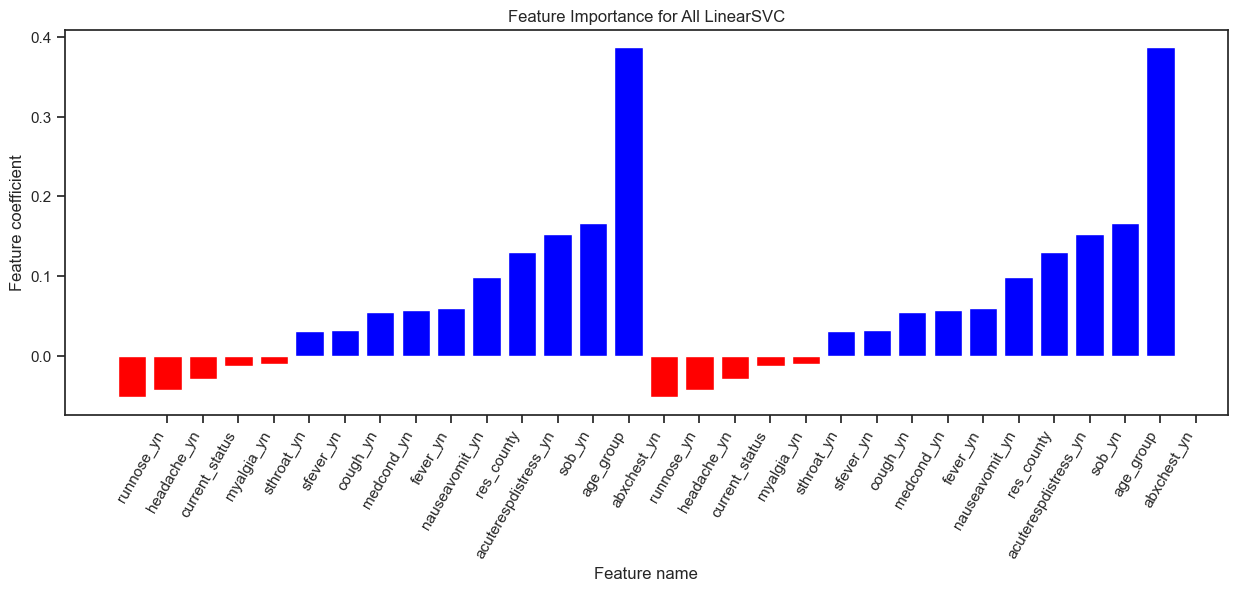

In [101]:
plot_coefficients(svc6.named_steps['svc'], features_svc, top_features=len(features_svc))

In [102]:
importance5 = svc6.named_steps['svc'].coef_.ravel()

for i,v in enumerate(importance5):
    print(f'({i}) {features_svc[i] : <25}: {v : ^30.3f}')

(0) current_status           :             -0.029            
(1) abxchest_yn              :             0.387             
(2) acuterespdistress_yn     :             0.131             
(3) fever_yn                 :             0.058             
(4) sfever_yn                :             0.031             
(5) myalgia_yn               :             -0.013            
(6) runnose_yn               :             -0.052            
(7) sthroat_yn               :             -0.011            
(8) cough_yn                 :             0.032             
(9) sob_yn                   :             0.153             
(10) nauseavomit_yn           :             0.060             
(11) headache_yn              :             -0.043            
(12) medcond_yn               :             0.055             
(13) res_county               :             0.099             
(14) age_group                :             0.166             
